In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [26]:
weather_data = pd.read_csv("csc_files\weatherHistory.csv")
weather_data.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\AmirrezA\AppData\Local\Temp\ipykernel_2828\2182865677.py:1: SyntaxWarning: invalid escape sequence '\w'
  weather_data = pd.read_csv("csc_files\weatherHistory.csv")


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [27]:
weather_data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [28]:
weather_data['Formatted Date'] = pd.to_datetime(weather_data['Formatted Date'], errors='coerce', utc=True)
weather_data = weather_data.dropna(subset=['Formatted Date'])
weather_data['Day of Year'] = weather_data['Formatted Date'].dt.dayofyear
weather_data['Year'] = weather_data['Formatted Date'].dt.year
weather_data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Day of Year,Year
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,90,2006
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,90,2006
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,91,2006
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,91,2006
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,91,2006


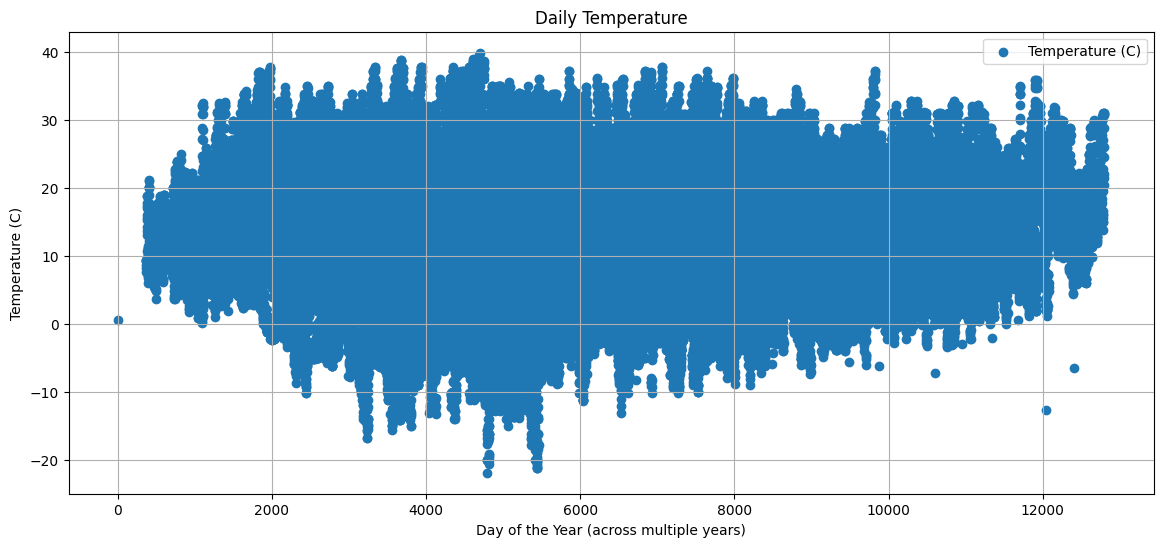

In [29]:
temperature_data = weather_data[['Day of Year', 'Year', 'Temperature (C)']].copy()
temperature_data['Continuous Day'] = temperature_data.groupby('Year').cumcount() + 1
temperature_data['Continuous Day'] += (temperature_data['Year'] - temperature_data['Year'].min()) * 365
plt.figure(figsize=(14, 6))
plt.scatter(temperature_data['Continuous Day'], temperature_data['Temperature (C)'], label='Temperature (C)')
plt.xlabel('Day of the Year (across multiple years)')
plt.ylabel('Temperature (C)')
plt.title('Daily Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [30]:
daily_mean_temperature = weather_data.groupby(['Year', 'Day of Year'])['Temperature (C)'].mean().reset_index()
daily_mean_temperature.columns = ['Year', 'Day of Year', 'Mean Temperature (C)']
daily_mean_temperature = daily_mean_temperature[['Day of Year', 'Mean Temperature (C)']]
daily_mean_temperature.head()
daily_mean_temperature.shape

(4019, 2)

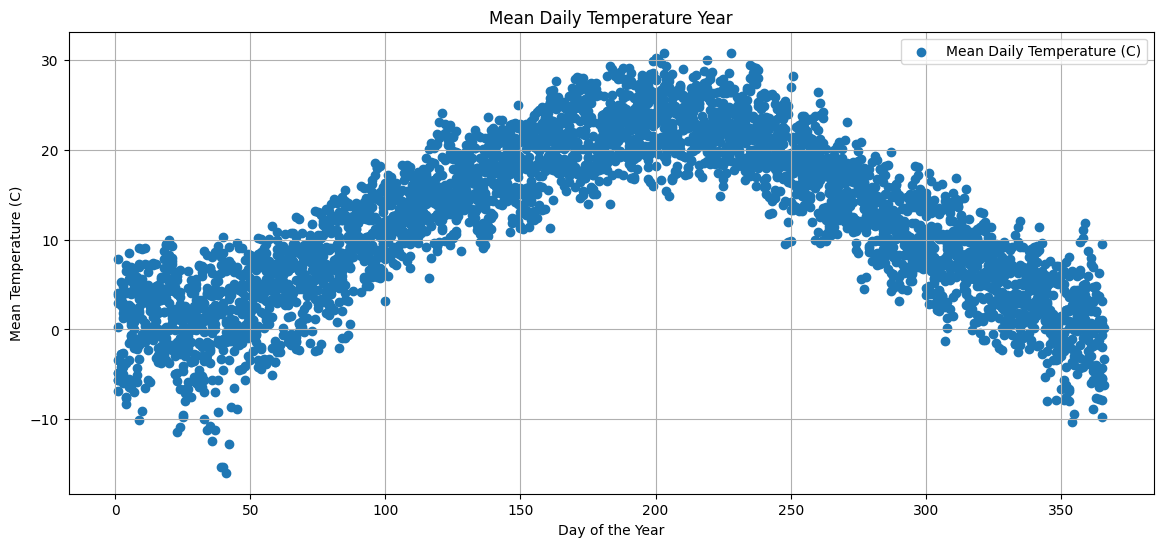

In [31]:
plt.figure(figsize=(14, 6))
plt.scatter(daily_mean_temperature['Day of Year'], daily_mean_temperature['Mean Temperature (C)'], label='Mean Daily Temperature (C)')
plt.xlabel('Day of the Year')
plt.ylabel('Mean Temperature (C)')
plt.title('Mean Daily Temperature Year')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
X = daily_mean_temperature['Day of Year'].values.reshape(-1, 1)
Y = daily_mean_temperature['Mean Temperature (C)'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3215, 1), (804, 1), (3215,), (804,))

In [33]:
class Perceptron:
    def __init__(self, input_length, learning_rate, activation_func):
        self.W = np.random.rand(input_length)
        self.b = np.random.rand(1)
        self.learning_rate = learning_rate
        self.activation_func = activation_func
    
    def activation(self, x, function):
        if function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif function == "relu":
            return np.maximum(0, x)
        elif function == "tanh":
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        elif function == "linear":
            return x
        else:
            raise Exception("Not supported activation function")

        
    def forward(self, x):
        return self.activation(x @ self.W + self.b, self.activation_func)
    
    def back_propagation(self, X_train, y_train, y_pred):
        dW = (y_pred - y_train) * X_train
        db = (y_pred - y_train)
        return dW, db
    
    def update(self, dW, db):
        self.W = self.W - self.learning_rate * dW
        self.b = self.b - self.learning_rate * db

    def fit(self, X_train, y_train, X_test , y_test, epochs):
        Loss_train = []
        Acc_train = []
        Loss_test = []
        Acc_test = []

        for epoch in tqdm(range(epochs)):
            for X, y in zip(X_train, y_train):
                y_pred = self.forward(X)
                dW, db = self.back_propagation(X, y, y_pred)
                self.update(dW, db)
            l_train, a_train = self.evaluate(X_train , y_train)
            l_test, a_test = self.evaluate(X_test , y_test)

            Loss_train.append(l_train)
            Acc_train.append(a_train)
            Loss_test.append(l_test)
            Acc_test.append(a_test)

        return Loss_train, Acc_train, Loss_test, Acc_test

    def predict(self, X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = self.forward(x_test)
            Y_pred.append(y_pred)
        return np.array(Y_pred)
    
    def calc_loss(self, X_test, y_test, metric):
        y_pred = self.predict(X_test)
        if metric == "mse":
            loss = np.mean((y_pred - y_test) ** 2)
        elif metric == "mae":
            loss = np.mean(np.abs(y_pred - y_test))
        else:
            raise Exception("Not supported metric")
        return loss

    def calc_accuracy(self, X_test, y_test, metric):
        Y_pred = self.predict(X_test) > 0.5
        return np.mean(Y_pred == y_test)

    def evaluate(self, X_test, y_test):
        loss = self.calc_loss(X_test, y_test, 'mse')
        accuracy = self.calc_accuracy(X_test, y_test)
        return loss, accuracy

    def __init__(self, input_length, learning_rate, function="sigmoid"):
        self.weights = np.random.rand(input_length)
        self.bias = np.random.rand(1)
        self.learning_rate = learning_rate
        self.function = function

    def activation(self, x):
        if self.function == "sigmoid":
            return 1 / (1 + np.exp(-x))
        elif self.function == "relu":
            return np.maximum(0, x)
        elif self.function == "tanh":
            return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
        elif self.function == "linear":
            return x
        elif self.function == "Leaky ReLU":
            if x >= 0:
                return x
            else:
                return 0.2 * x
        elif self.function == "sign":
            if x > 0:
                return 1
            elif x == 0:
                return 0
            elif x < 0:
                return -1
        elif self.function == "unitstep":
            if x > 0:
                return 1
            elif x == 0:
                return 0.5
            elif x < 0:
                return 0
        else:
            raise Exception("Not supported activation function")

    def forward(self, x):
        return self.activation(x * self.weights + self.bias)

    def back_propagation(self, x_train, y_train, y_pred):
        d_w = (y_pred - y_train) * x_train
        d_b = (y_pred - y_train)
        return d_w, d_b

    def update(self, d_w, d_b):
        self.weights = self.weights - self.learning_rate * d_w
        self.bias = self.bias - self.learning_rate * d_b

    def fit(self, X_train, Y_train, X_test, Y_test, epochs):
        train_losses = []
        train_accuracies = []
        test_losses = []
        test_accuracies = []
        for epoch in tqdm(range(epochs)):
            for x_train, y_train in zip(X_train, Y_train):
                y_pred = self.forward(x_train)
                d_w, d_b = self.back_propagation(x_train, y_train, y_pred)
                self.update(d_w, d_b)
            train_loss, train_accuracy = self.evaluate(X_train, Y_train)
            test_loss, test_accuracy = self.evaluate(X_test, Y_test)

            train_losses.append(train_loss)
            train_accuracies.append(train_accuracy)

            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)
        return train_losses, train_accuracies, test_losses, test_accuracies

    def predict(self, X_test):
        Y_pred = []
        for x_test in X_test:
            y_pred = self.forward(x_test)
            Y_pred.append(y_pred)
        return np.array(Y_pred)

    def calculate_loss(self, X_test, Y_test, metric="mse"):
        y_pred = self.predict(X_test)
        if metric == "mse":
            loss = np.mean((y_pred - Y_test) ** 2)
        elif metric == "mae":
            loss = np.mean(np.abs(y_pred - Y_test))
        else:
            raise Exception("Not supported metric")
        return loss

    def calculate_accuracy(self, X_test, Y_test, metric="r2"):
        Y_pred = self.predict(X_test)
        if metric == "r2":
            RSS = np.sum((Y_test - Y_pred) ** 2)
            TSS = np.sum((Y_test - np.mean(Y_test)) ** 2)
            accuracy = 1 - RSS / TSS
        else:
            raise Exception("Not supported accuracy function")
        return accuracy

    def evaluate(self, X_test, Y_test):
        loss = self.calculate_loss(X_test, Y_test)
        accuracy = self.calculate_accuracy(X_test, Y_test)
        return loss, accuracy
    
    def predict_day_temperature(self, day_of_year):
        day_input = np.array([day_of_year])
        temperature = self.predict(day_input)
        return temperature[0] 

In [34]:
perceptron = Perceptron(input_length=1, learning_rate=0.00001, function="linear")
train_losses, train_accuracies, test_losses, test_accuracies = perceptron.fit(X_train, Y_train, X_test, Y_test, epochs=100)

100%|██████████| 100/100 [00:09<00:00, 10.35it/s]


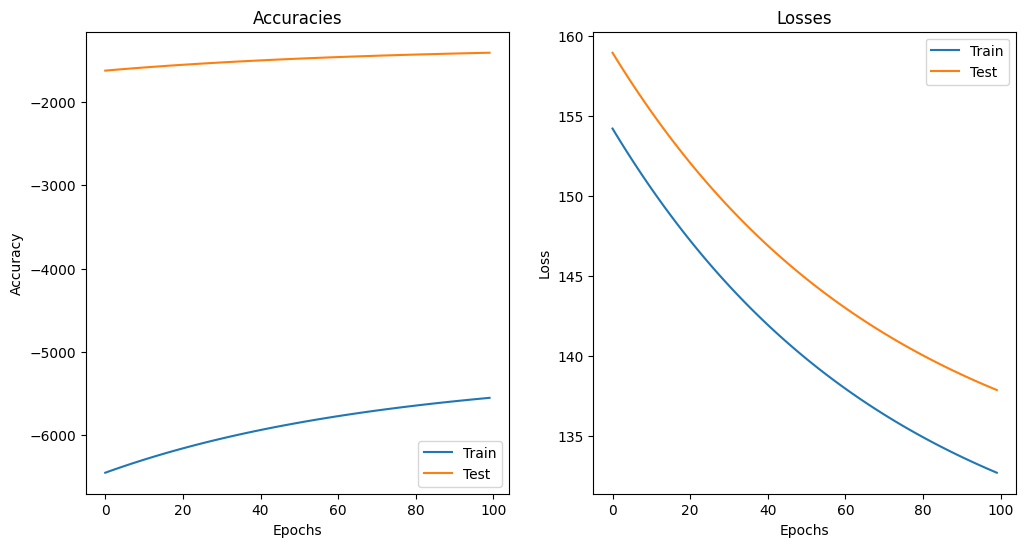

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(train_accuracies)
ax1.plot(test_accuracies)
ax1.set_title("Accuracies")
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Accuracy")
ax1.legend(['Train', 'Test'])

ax2.plot(train_losses)
ax2.plot(test_losses)
ax2.set_title("Losses")
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Loss")
ax2.legend(['Train', 'Test'])

plt.show()

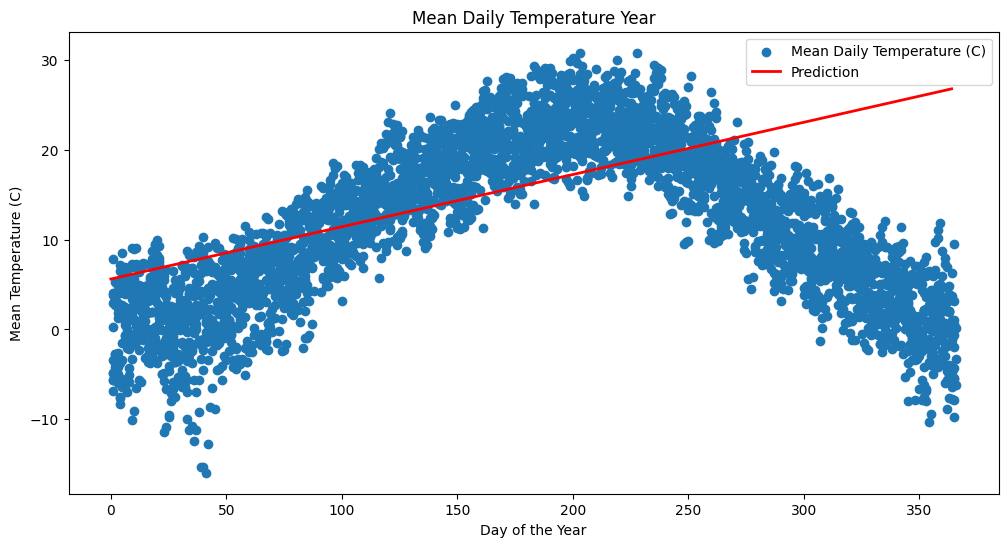

In [36]:
plt.figure(figsize=(12, 6))
plt.scatter(daily_mean_temperature['Day of Year'], daily_mean_temperature['Mean Temperature (C)'], label='Mean Daily Temperature (C)')
plt.plot(perceptron.weights[0] * range(365) + perceptron.bias[0], color="red", linewidth=2, label='Prediction')
plt.title("Mean Daily Temperature Year")
plt.xlabel("Day of the Year")
plt.ylabel("Mean Temperature (C)")
plt.legend()
plt.show()

In [38]:
day_of_year = 200
predicted_temperature = perceptron.predict_day_temperature(day_of_year)
print("Predicted Temperature for Day", day_of_year, ":", predicted_temperature)

Predicted Temperature for Day 200 : [17.24839397]


In [41]:
np.save("weight_weights.npy", perceptron.weights[0])
np.save("weight_bias.npy", perceptron.bias[0])